In [1]:
#libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
% matplotlib inline
plt.style.use('ggplot')
import warnings

warnings.filterwarnings("ignore")
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)
pd.set_option('max_rows', 100)
from wordcloud import WordCloud
import plotly.offline as py

py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from IPython.display import display

from sklearn.metrics import cohen_kappa_score

def kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')


In [2]:
breeds = pd.read_csv('../all/breed_labels.csv')
colors = pd.read_csv('../all/color_labels.csv')
states = pd.read_csv('../all/state_labels.csv')

train = pd.read_csv('../all/train.csv')
test = pd.read_csv('../all/test/test.csv')
sub = pd.read_csv('../all/test/sample_submission.csv')

train['dataset_type'] = 'train'
test['dataset_type'] = 'test'
all_data = pd.concat([train, test])

In [3]:
train.isnull().sum()/len(train)*100

Type             0.000000
Name             8.383912
Age              0.000000
Breed1           0.000000
Breed2           0.000000
Gender           0.000000
Color1           0.000000
Color2           0.000000
Color3           0.000000
MaturitySize     0.000000
FurLength        0.000000
Vaccinated       0.000000
Dewormed         0.000000
Sterilized       0.000000
Health           0.000000
Quantity         0.000000
Fee              0.000000
State            0.000000
RescuerID        0.000000
VideoAmt         0.000000
Description      0.080037
PetID            0.000000
PhotoAmt         0.000000
AdoptionSpeed    0.000000
dataset_type     0.000000
dtype: float64

In [4]:
train.var()

Type                 0.248220
Age                329.632725
Breed1            3606.821432
Breed2           15131.847557
Gender               0.464568
Color1               3.045812
Color2               7.521645
Color3               8.904768
MaturitySize         0.300259
FurLength            0.358885
Vaccinated           0.445756
Dewormed             0.484161
Sterilized           0.320551
Health               0.039814
Quantity             2.168189
Fee               6148.841286
State             1052.623062
VideoAmt             0.119844
PhotoAmt            12.164820
AdoptionSpeed        1.385952
dtype: float64

In [5]:
train.drop('Description', axis=1).head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,PetID,PhotoAmt,AdoptionSpeed,dataset_type
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,86e1089a3,1.0,2,train
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,6296e909a,2.0,0,train
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,3422e4906,7.0,3,train
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,5842f1ff5,8.0,2,train
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,850a43f90,3.0,2,train


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 25 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

Text(0.5, 1.0, 'Adoption speed classes counts')

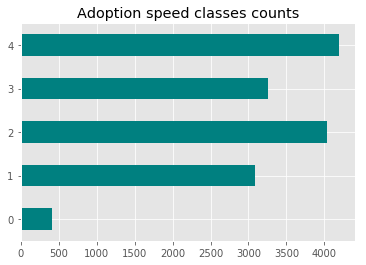

In [7]:
train['AdoptionSpeed'].value_counts().sort_index().plot('barh', color='teal')
plt.title('Adoption speed classes counts')

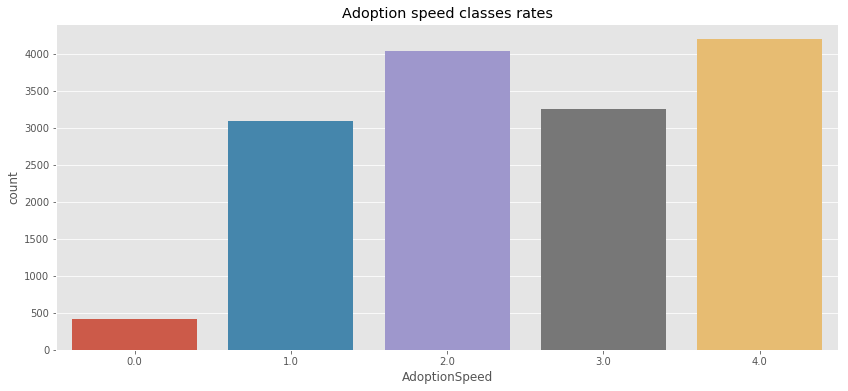

In [8]:
plt.figure(figsize=(14, 6));
g = sns.countplot(x='AdoptionSpeed', data=all_data.loc[all_data['dataset_type'] == 'train']);
plt.title('Adoption speed classes rates');
ax=g.axes

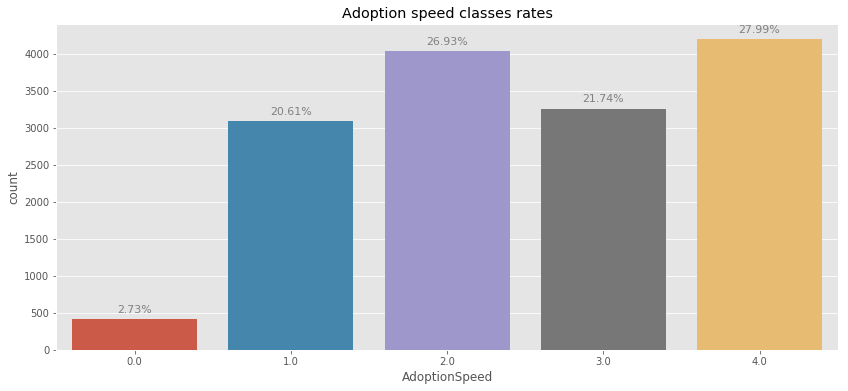

In [9]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='AdoptionSpeed', data=all_data.loc[all_data['dataset_type'] == 'train'])
plt.title('Adoption speed classes rates');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / train.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points')  

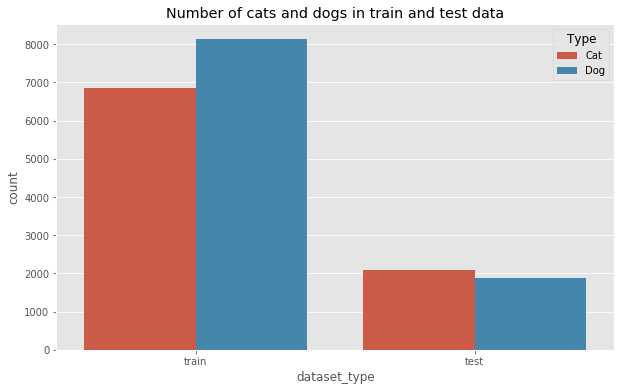

In [10]:


all_data['Type'] = all_data['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')
plt.figure(figsize=(10, 6));
sns.countplot(x='dataset_type', data=all_data, hue='Type');
plt.title('Number of cats and dogs in train and test data');



In [11]:
main_count = train['AdoptionSpeed'].value_counts(normalize=True).sort_index()
def prepare_plot_dict(df, col, main_count):
    """
    Preparing dictionary with data for plotting.
    
    I want to show how much higher/lower are the rates of Adoption speed for the current column comparing to base values (as described higher),
    At first I calculate base rates, then for each category in the column I calculate rates of Adoption speed and find difference with the base rates.
    
    """
    main_count = dict(main_count)
    plot_dict = {}
    for i in df[col].unique():
        val_count = dict(df.loc[df[col] == i, 'AdoptionSpeed'].value_counts().sort_index())

        for k, v in main_count.items():
            if k in val_count:
                plot_dict[val_count[k]] = ((val_count[k] / sum(val_count.values())) / main_count[k]) * 100 - 100
            else:
                plot_dict[0] = 0

    return plot_dict

def make_count_plot(df, x, hue='AdoptionSpeed', title='', main_count=main_count):
    """
    Plotting countplot with correct annotations.
    """
    g = sns.countplot(x=x, data=df, hue=hue);
    plt.title(f'AdoptionSpeed {title}');
    ax = g.axes

    plot_dict = prepare_plot_dict(df, x, main_count)

    for p in ax.patches:
        h = p.get_height() if str(p.get_height()) != 'nan' else 0
        text = f"{plot_dict[h]:.0f}%" if plot_dict[h] < 0 else f"+{plot_dict[h]:.0f}%"
        ax.annotate(text, (p.get_x() + p.get_width() / 2., h),
             ha='center', va='center', fontsize=11, color='green' if plot_dict[h] > 0 else 'red', rotation=0, xytext=(0, 10),
             textcoords='offset points')  


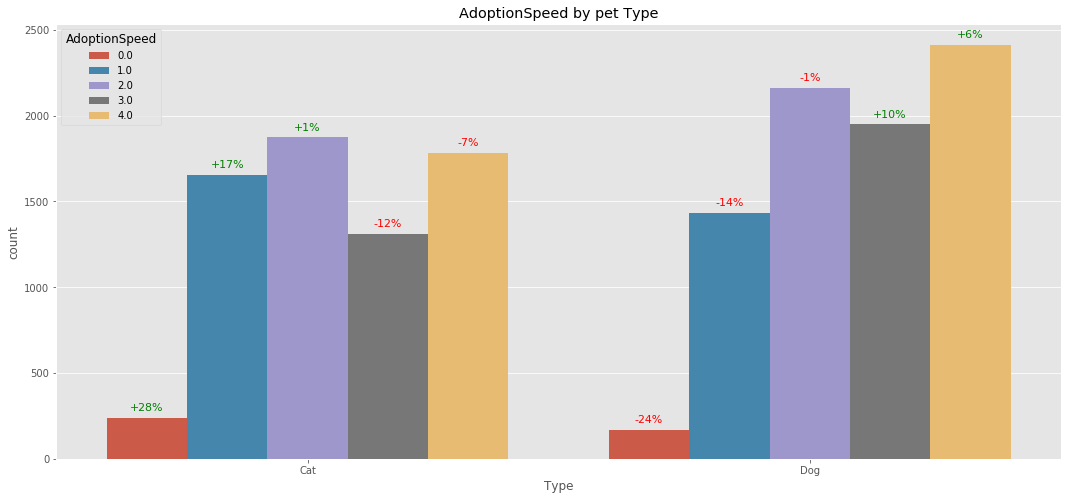

In [12]:
plt.figure(figsize=(18, 8));
make_count_plot(df=all_data.loc[all_data['dataset_type'] == 'train'], x='Type', title='by pet Type')

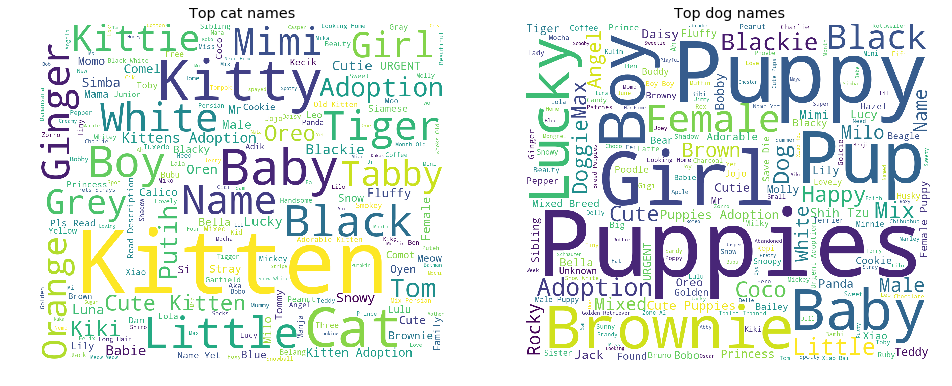

In [13]:

fig, ax = plt.subplots(figsize = (16, 12))
plt.subplot(1, 2, 1)
text_cat = ' '.join(all_data.loc[all_data['Type'] == 'Cat', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top cat names')
plt.axis("off")

plt.subplot(1, 2, 2)
text_dog = ' '.join(all_data.loc[all_data['Type'] == 'Dog', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top dog names')
plt.axis("off")

plt.show()

In [14]:
train['Name'].value_counts().index[:5]

Index(['Baby', 'Lucky', 'Brownie', 'No Name', 'Mimi'], dtype='object')

In [15]:
train['Name'] = train['Name'].fillna('Unnamed')
test['Name'] = test['Name'].fillna('Unnamed')
all_data['Name'] = all_data['Name'].fillna('Unnamed')

train['No_name'] = 0
train.loc[train['Name'] == 'Unnamed', 'No_name'] = 1
test['No_name'] = 0
test.loc[test['Name'] == 'Unnamed', 'No_name'] = 1
all_data['No_name'] = 0
all_data.loc[all_data['Name'] == 'Unnamed', 'No_name'] = 1

print(f"Rate of unnamed pets in train data: {train['No_name'].sum() * 100 / train['No_name'].shape[0]:.4f}%.")
print(f"Rate of unnamed pets in test data: {test['No_name'].sum() * 100 / test['No_name'].shape[0]:.4f}%.")

Rate of unnamed pets in train data: 8.4173%.
Rate of unnamed pets in test data: 7.6748%.


In [16]:


pd.crosstab(train['No_name'], train['AdoptionSpeed'], normalize='index')



AdoptionSpeed,0,1,2,3,4
No_name,,,,,
0,0.027966,0.205302,0.271211,0.221470,0.274051
1,0.020602,0.214739,0.248019,0.172742,0.343899


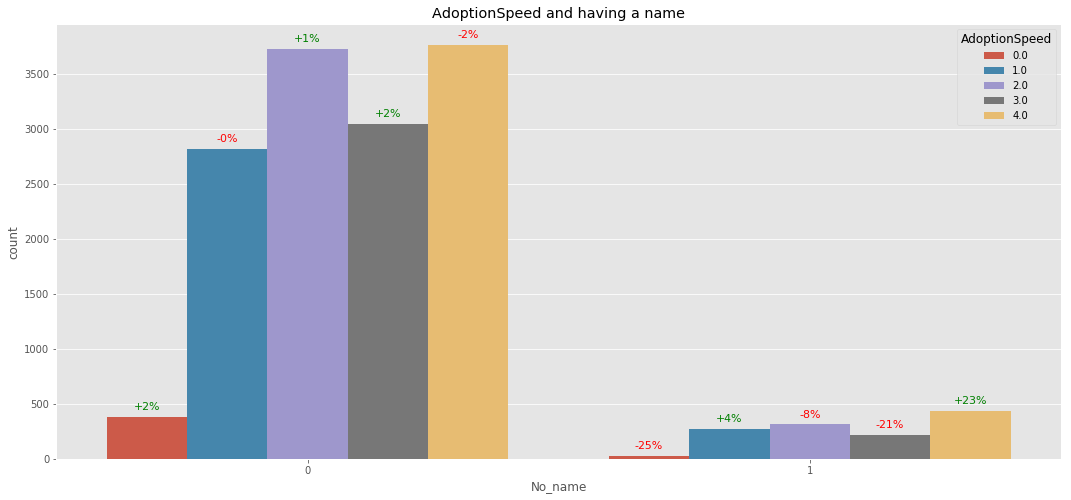

In [17]:
plt.figure(figsize=(18, 8));
make_count_plot(df=all_data.loc[all_data['dataset_type'] == 'train'], x='No_name', title='and having a name')

In [18]:


all_data[all_data['Name'].apply(lambda x: len(str(x))) < 3]['Name']



71       H3
78       Z3
103       C
167      BB
238      QQ
252      Y1
325      H1
366      D9
423      Y4
487      Z4
595      BB
630      DD
746      M2
767      H6
783      D4
898      QQ
956      JJ
1179     F1
1196     W7
1586     1F
1598     Q1
1656      6
1672     CJ
1678     3F
1710     BB
1799     KD
1856     DD
1886     G1
2142     B3
2145     Cc
2234     F6
2291     Mk
2305     A5
2566     GM
2677     D5
2782     EE
2888     A4
2951     Q4
2969      B
3004     CC
3376     Y7
3491     W6
3614     A3
3713     A1
3769     T1
3805     W1
3855     M4
4028     P5
4048     H2
4067     JJ
         ..
13658    Z1
13739    H5
13869    S2
13897    R2
13959    F3
13967    JJ
14230    H7
14335    Q7
14340    B1
14376     A
14596    B2
14682    Q5
14717    PJ
14724    KT
14740    H4
14764    F1
14895    B1
166      V1
189      V4
193      Mo
196      G1
208      B1
231      V2
236      V3
241      JJ
481       3
507       G
1058     GG
1725     P5
1728     A1
1734     A3
1903     MJ
2032

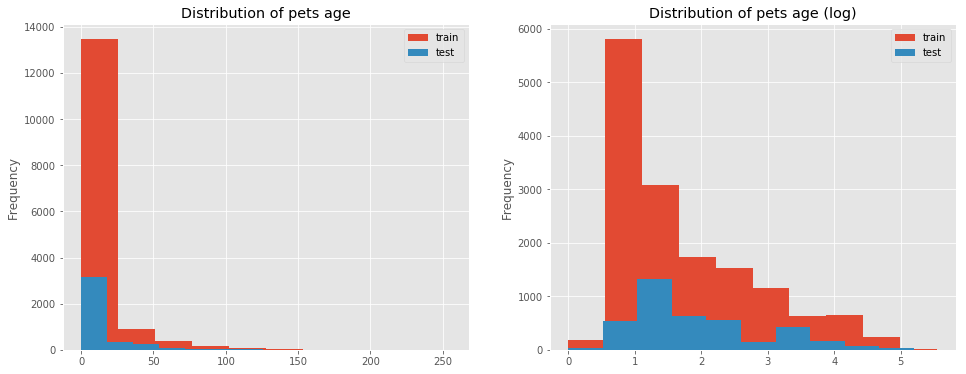

In [19]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.title('Distribution of pets age');
train['Age'].plot('hist', label='train');
test['Age'].plot('hist', label='test');
plt.legend();

plt.subplot(1, 2, 2)
plt.title('Distribution of pets age (log)');
np.log1p(train['Age']).plot('hist', label='train');
np.log1p(test['Age']).plot('hist', label='test');
plt.legend();

In [20]:
pd.qcut(train['Age'], 3, labels=['0-2 months', '3-5months', '6-120 months'])

0           3-5months
1          0-2 months
2          0-2 months
3           3-5months
4          0-2 months
5           3-5months
6        6-120 months
7          0-2 months
8          0-2 months
9        6-120 months
10         0-2 months
11          3-5months
12         0-2 months
13         0-2 months
14          3-5months
15       6-120 months
16          3-5months
17       6-120 months
18         0-2 months
19         0-2 months
20       6-120 months
21          3-5months
22         0-2 months
23       6-120 months
24          3-5months
25       6-120 months
26         0-2 months
27         0-2 months
28       6-120 months
29         0-2 months
30          3-5months
31         0-2 months
32       6-120 months
33          3-5months
34          3-5months
35       6-120 months
36       6-120 months
37         0-2 months
38       6-120 months
39       6-120 months
40         0-2 months
41         0-2 months
42       6-120 months
43          3-5months
44       6-120 months
45        

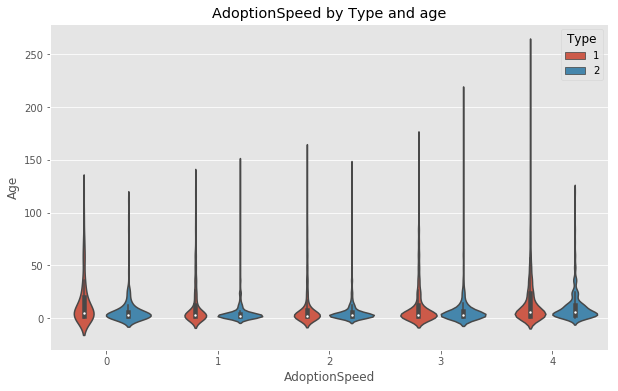

In [21]:
plt.figure(figsize=(10, 6));
sns.violinplot(x="AdoptionSpeed", y="Age", hue="Type", data=train);
plt.title('AdoptionSpeed by Type and age');

In [22]:


data = []
for a in range(5):
    df = train.loc[train['AdoptionSpeed'] == a]

    data.append(go.Scatter(
        x = df['Age'].value_counts().sort_index().index,
        y = df['Age'].value_counts().sort_index().values,
        name = str(a)
    ))
    
layout = go.Layout(dict(title = "AdoptionSpeed trends by Age",
                  xaxis = dict(title = 'Age (months)'),
                  yaxis = dict(title = 'Counts'),
                  )
                  )
py.iplot(dict(data=data, layout=layout), filename='basic-line')



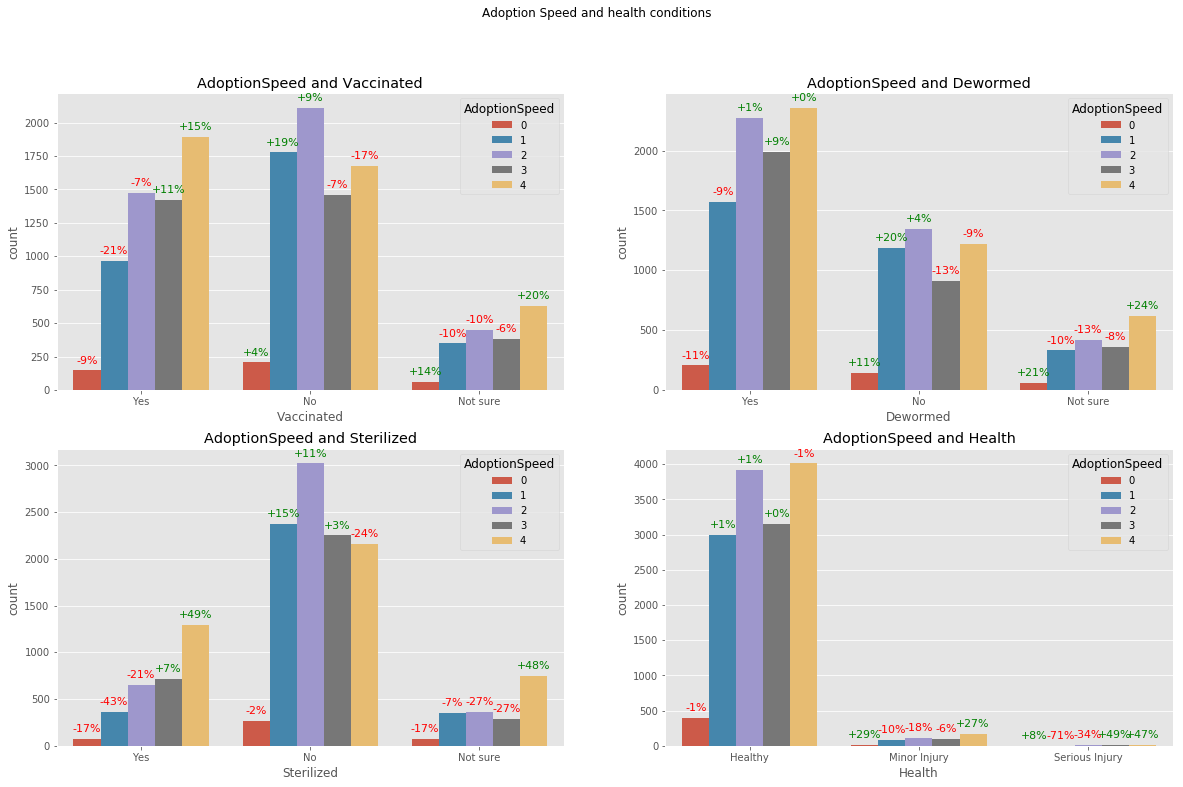

In [23]:
plt.figure(figsize=(20, 12));
plt.subplot(2, 2, 1)
make_count_plot(df=train, x='Vaccinated', title='Vaccinated')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure']);
plt.title('AdoptionSpeed and Vaccinated');

plt.subplot(2, 2, 2)
make_count_plot(df=train, x='Dewormed', title='Dewormed')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure']);
plt.title('AdoptionSpeed and Dewormed');

plt.subplot(2, 2, 3)
make_count_plot(df=train, x='Sterilized', title='Sterilized')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure']);
plt.title('AdoptionSpeed and Sterilized');

plt.subplot(2, 2, 4)
make_count_plot(df=train, x='Health', title='Health')
plt.xticks([0, 1, 2], ['Healthy', 'Minor Injury', 'Serious Injury']);
plt.title('AdoptionSpeed and Health');

plt.suptitle('Adoption Speed and health conditions');

In [24]:
def make_factor_plot(df, x, col, title, main_count=main_count, hue=None, ann=True, col_wrap=4):
    """
    Plotting countplot.
    Making annotations is a bit more complicated, because we need to iterate over axes.
    """
    if hue:
        g = sns.factorplot(col, col=x, data=df, kind='count', col_wrap=col_wrap, hue=hue);
    else:
        g = sns.factorplot(col, col=x, data=df, kind='count', col_wrap=col_wrap);
    plt.subplots_adjust(top=0.9);
    plt.suptitle(title);
    ax = g.axes
    plot_dict = prepare_plot_dict(df, x, main_count)
    if ann:
        for a in ax:
            for p in a.patches:
                text = f"{plot_dict[p.get_height()]:.0f}%" if plot_dict[p.get_height()] < 0 else f"+{plot_dict[p.get_height()]:.0f}%"
                a.annotate(text, (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='green' if plot_dict[p.get_height()] > 0 else 'red', rotation=0, xytext=(0, 10),
                     textcoords='offset points') 

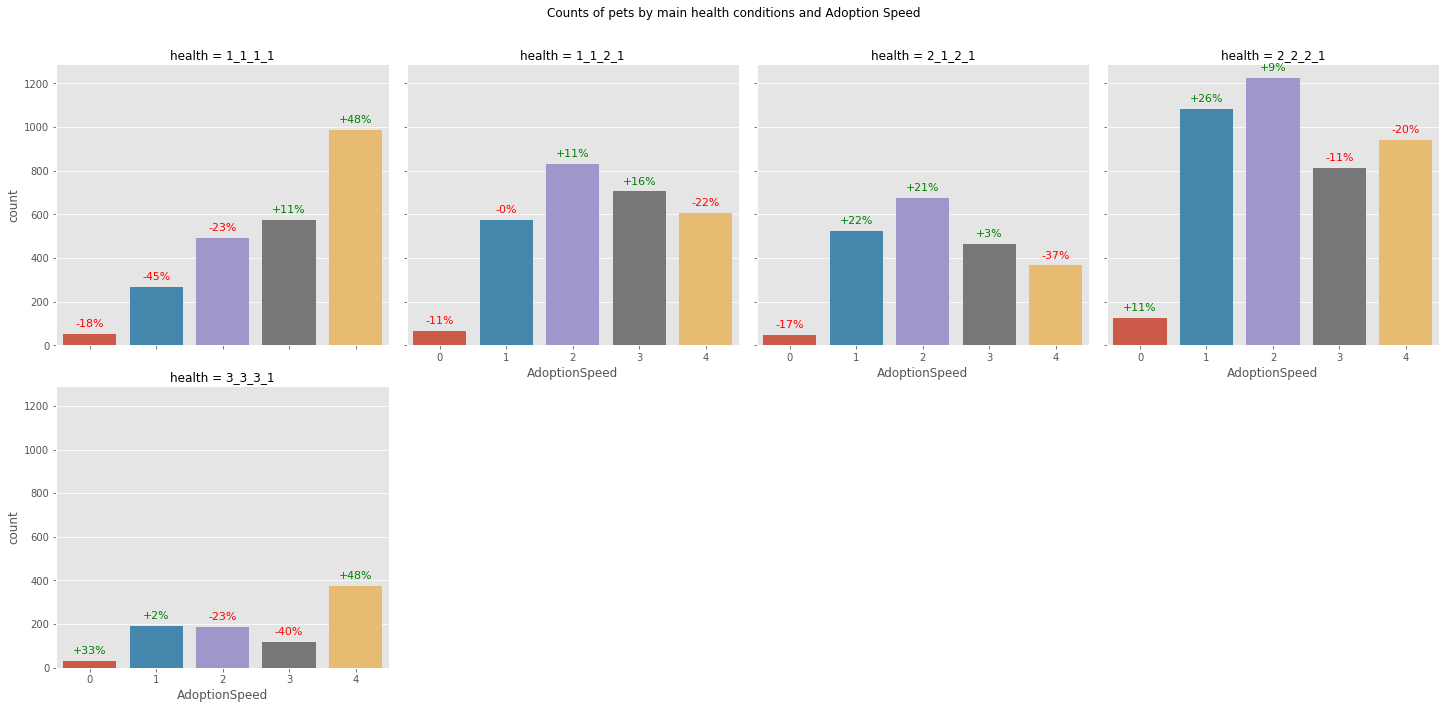

In [25]:
train['health'] = train['Vaccinated'].astype(str) + '_' + train['Dewormed'].astype(str) + '_' + train['Sterilized'].astype(str) + '_' + train['Health'].astype(str)
test['health'] = test['Vaccinated'].astype(str) + '_' + test['Dewormed'].astype(str) + '_' + test['Sterilized'].astype(str) + '_' + test['Health'].astype(str)


make_factor_plot(df=train.loc[train['health'].isin(list(train.health.value_counts().index[:5]))], x='health', col='AdoptionSpeed', title='Counts of pets by main health conditions and Adoption Speed')